<a href="https://colab.research.google.com/github/SakethKoona/portfolio/blob/main/SMA_Trading_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Moving Averages Strategy in Python
This project aims to explore and analyze the use of simple moving strategies to create a crossover strategy in python with various assets, and compare their returns and profit as compared to a simple buy&hold strategy.

In [96]:
pip install mplfinance

In [97]:
# Installing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
import seaborn as sns
import mplfinance as mpf

yf.pdr_override()

In [215]:
# Data Collection using pandas_datareader and the yahoo finance API
TICKER = 'AAPL'

then = dt.datetime(2018, 1, 1)
now = dt.datetime.now()

df = pdr.get_data_yahoo(TICKER, then, now)['Adj Close']
df.head()
df.to_csv("df.csv")

[*********************100%%**********************]  1 of 1 completed


In [216]:
df = pd.read_csv("/content/df.csv", parse_dates=True, index_col=0)

## Some Basic Data Cleaning and Exploration
Before we can create our strategy, we need to make sure the data is properly cleaned and ready for analysis. This involved checking for NaN values, looking at datatypes, and checking proper format.




In [217]:
# Checking for any NA values
df.isna().sum()

Adj Close    0
dtype: int64

In [218]:
# Looking at all datatypes
df.dtypes

Adj Close    float64
dtype: object

A simple moving average is a rolling window that passes through the data, where each value is the average of N-terms before it.

In [219]:
# Let's create a 200 day and 50 day moving average
df['200_sma'] = df['Adj Close'].rolling(200, min_periods=0).mean()
df['50_sma'] = df['Adj Close'].rolling(50, min_periods=0).mean()
df

,Adj Close,200_sma,50_sma
Date,,,
2018-01-02,40.722878,40.722878,40.722878
2018-01-03,40.715782,40.719330,40.719330
2018-01-04,40.904907,40.781189,40.781189
2018-01-05,41.370617,40.928546,40.928546
2018-01-08,41.216965,40.986230,40.986230
...,...,...,...
2024-01-17,182.679993,180.583617,189.292038
2024-01-18,188.630005,180.705598,189.536287
2024-01-19,191.559998,180.835905,189.787603


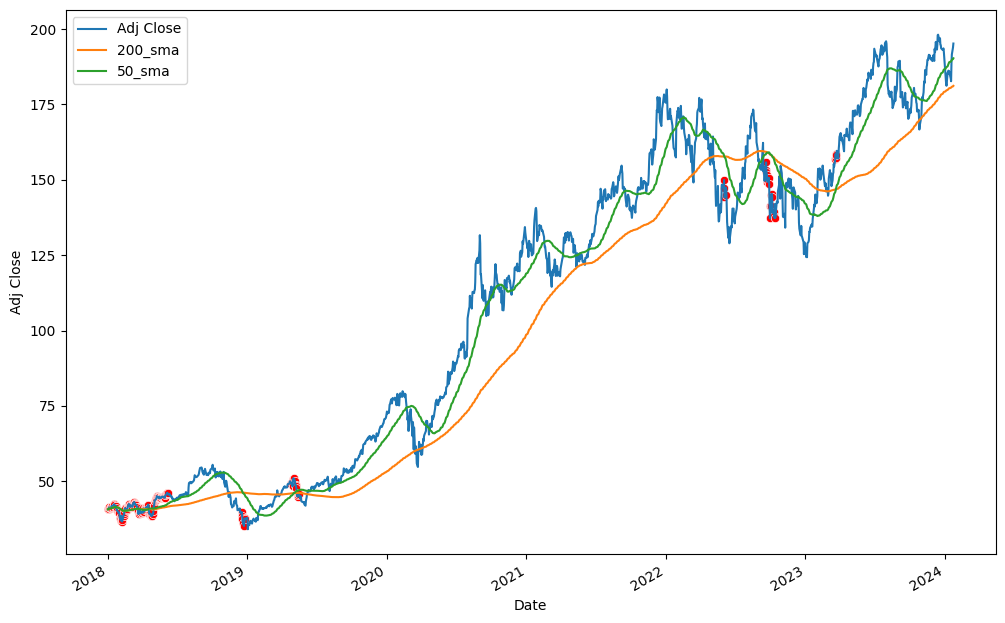

In [220]:
# Identifying where the moving averages cross over each other with a slight margin of error
crossovers = df[abs(df['200_sma'] - df['50_sma']) <= 1.0]

fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(crossovers['Adj Close'], color='red', ax=ax)
df[['Adj Close', '200_sma', '50_sma']].plot(ax=ax)

plt.legend()
plt.show()

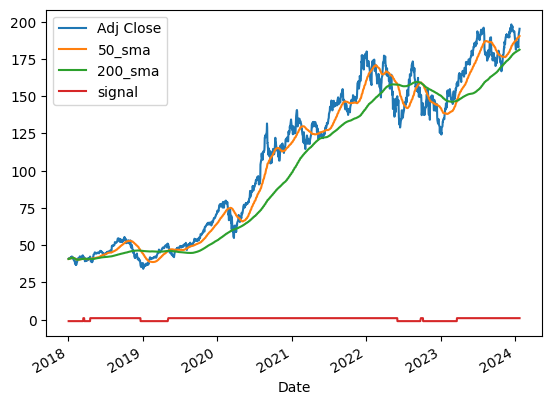

In [221]:
df['signal'] = np.where(df['50_sma'] > df['200_sma'], 1, -1)


df[['Adj Close', '50_sma', '200_sma', 'signal']].plot()
plt.show()

In [222]:
df['returns'] = df['Adj Close'].pct_change()
df['strategy_returns'] = df['returns'] * df['signal']
df

,Adj Close,200_sma,50_sma,signal,returns,strategy_returns
Date,,,,,,
2018-01-02,40.722878,40.722878,40.722878,-1,NaN,NaN
2018-01-03,40.715782,40.719330,40.719330,-1,-0.000174,0.000174
2018-01-04,40.904907,40.781189,40.781189,-1,0.004645,-0.004645
2018-01-05,41.370617,40.928546,40.928546,-1,0.011385,-0.011385
2018-01-08,41.216965,40.986230,40.986230,-1,-0.003714,0.003714
...,...,...,...,...,...,...
2024-01-17,182.679993,180.583617,189.292038,1,-0.005174,-0.005174
2024-01-18,188.630005,180.705598,189.536287,1,0.032571,0.032571
2024-01-19,191.559998,180.835905,189.787603,1,0.015533,0.015533


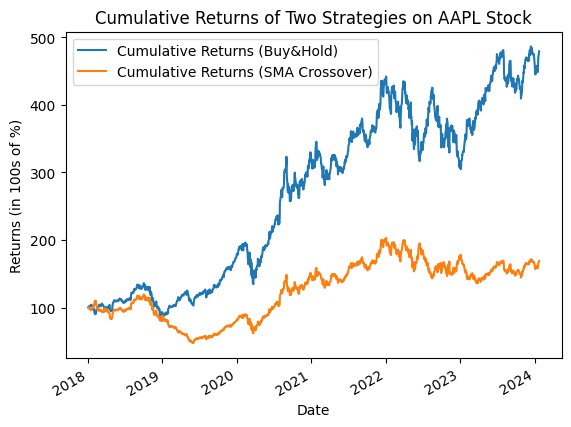

Cumulative Returns

Buy&Hold: 379.2883132192238 % increase
SMA Strategy: 68.88524753536555 % increase


In [224]:
df['cumul_returns'] = (1 + df['returns']).cumprod()
df['cumul_strategy_returns'] = (1 + df['strategy_returns']).cumprod()

(df[['cumul_returns', 'cumul_strategy_returns']]* 100).plot()

plt.legend(['Cumulative Returns (Buy&Hold)', 'Cumulative Returns (SMA Crossover)'])
plt.title(f"Cumulative Returns of Two Strategies on {TICKER} Stock")
plt.ylabel("Returns (in 100s of %)")
plt.show()

print("Cumulative Returns")
print("\nBuy&Hold: ", (df['cumul_returns'][-1] - 1) * 100, " %", " increase", sep="")
print("SMA Strategy: ", (df['cumul_strategy_returns'][-1] - 1) * 100, " %", " increase", sep="")

# Conclusions
From implementing this strategy, we can see that although that our SMA crossover strategy has shown significant cumulative returns at 68.88%, buying and holding shows to be much more fruitious. This can be explained with a number of various factors.
*   Historically, over long timeframes, the market has never shown negative returns and outperforms almost every other strategy.
*   Our SMA model was very basic in nature, and thus, it could be possible that we failed to consider other factors such as volitality, time, trends, etc. By considering these factors in the future, we can aim to create a more robust model with better moving averages more representative of the data.

We can also look to the future and analyze numerous variables and factors that could be affecting the performance of our model. In this project, we have only used one asset (apple stock). By testing our model with differing volitality, and differing timeframes, we can figure out what assets would yield the best returns using this strategy. A future project might look at a collection of assets with varying parameters to determine a more representative evaluation of our model.

